# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
data=pd.read_csv('telecom_churn.csv')
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [3]:
data.shape

(243553, 14)

In [4]:
data.dtypes

customer_id              int64
telecom_partner         object
gender                  object
age                      int64
state                   object
city                    object
pincode                  int64
date_of_registration    object
num_dependents           int64
estimated_salary         int64
calls_made               int64
sms_sent                 int64
data_used                int64
churn                    int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [6]:
data.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [9]:
data.nunique()

customer_id             243553
telecom_partner              4
gender                       2
age                         57
state                       28
city                         6
pincode                 213442
date_of_registration      1220
num_dependents               5
estimated_salary        110032
calls_made                 119
sms_sent                    59
data_used                11837
churn                        2
dtype: int64

# Exploratory Data Analysis (EDA)

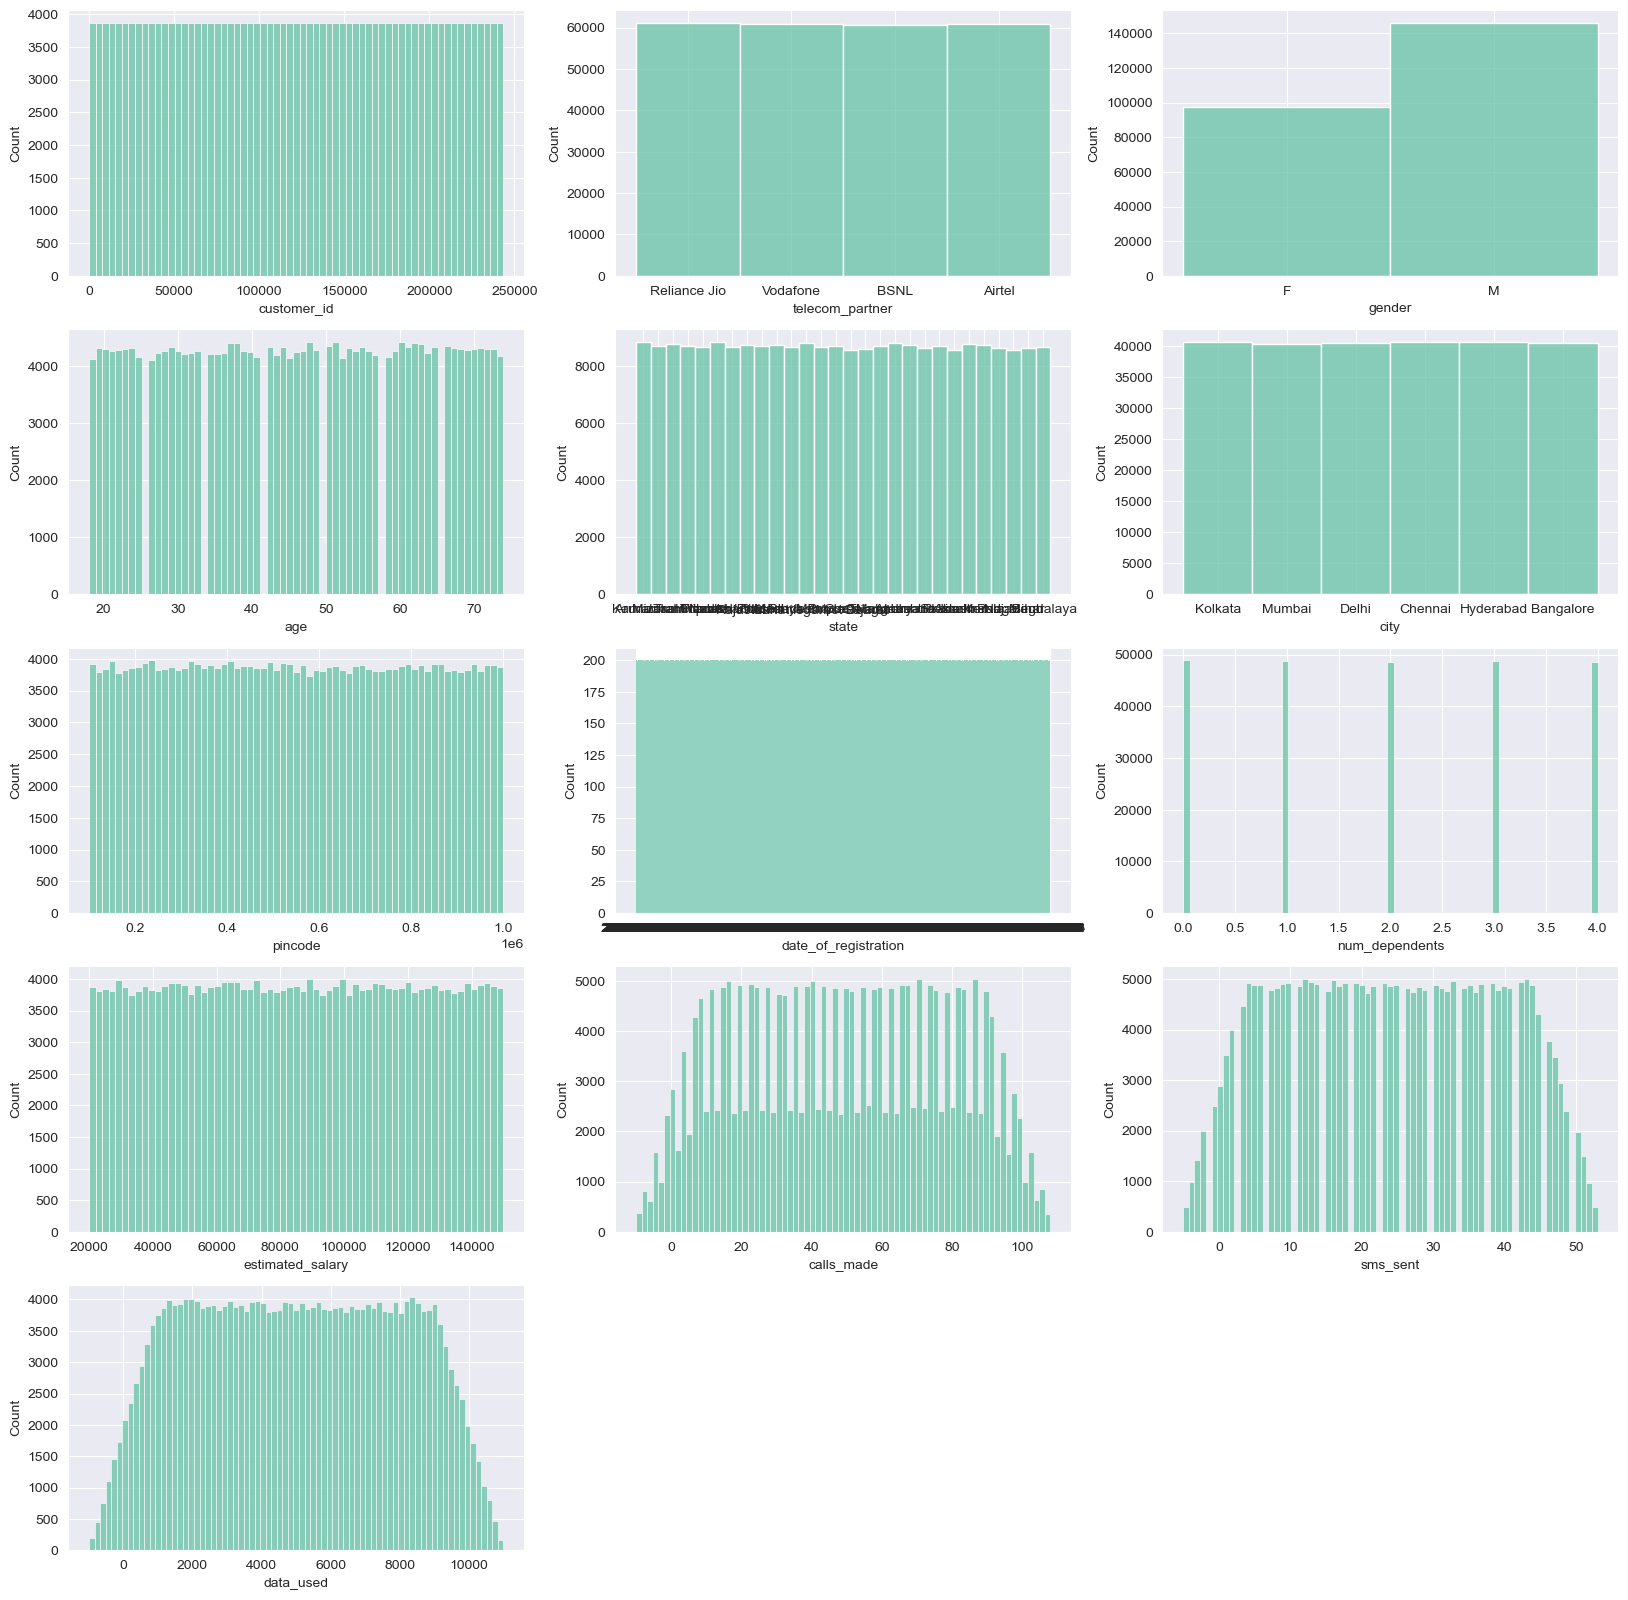

In [10]:
# Univariate Analysis - Feature Distributions
plt.figure(figsize=(20, 20))
i=1
for col in data.columns[:-1]:  
    plt.subplot(5, 3, i)
    sns.histplot(data[col])
    i=i+1


In [11]:
# Bivariate Analysis

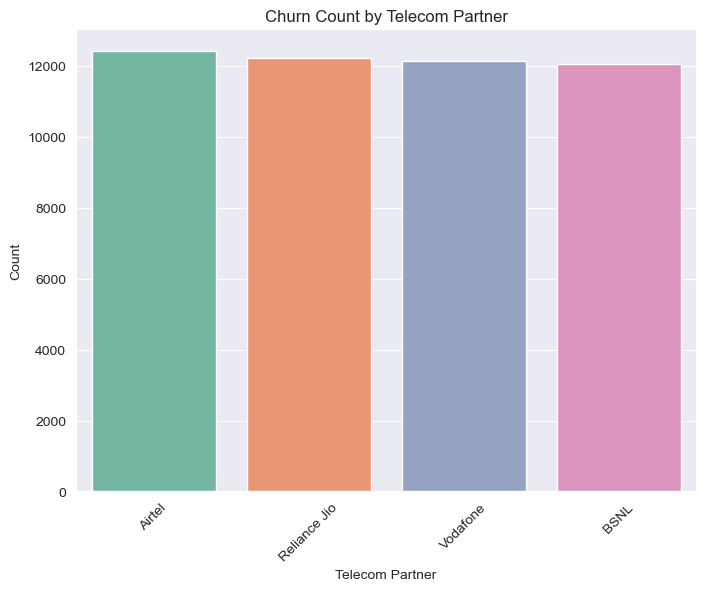

In [12]:
# Churn Distribution by Telecom Partner
plt.figure(figsize=(8, 6))
churn_counts = data[data['churn'] == 1]['telecom_partner'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")
plt.title("Churn Count by Telecom Partner")
plt.xlabel("Telecom Partner")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

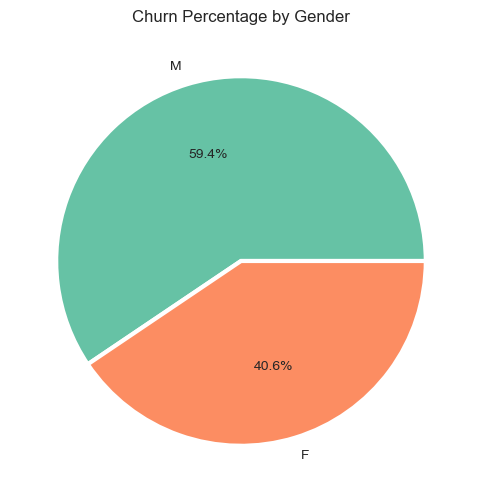

In [13]:
# Churn Distribution by Gender
gender_churn_counts = data[data['churn'] == 1]['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_churn_counts, 
    labels=gender_churn_counts.index, 
    autopct='%.1f%%', 
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'}
)
plt.title("Churn Percentage by Gender")
plt.show()

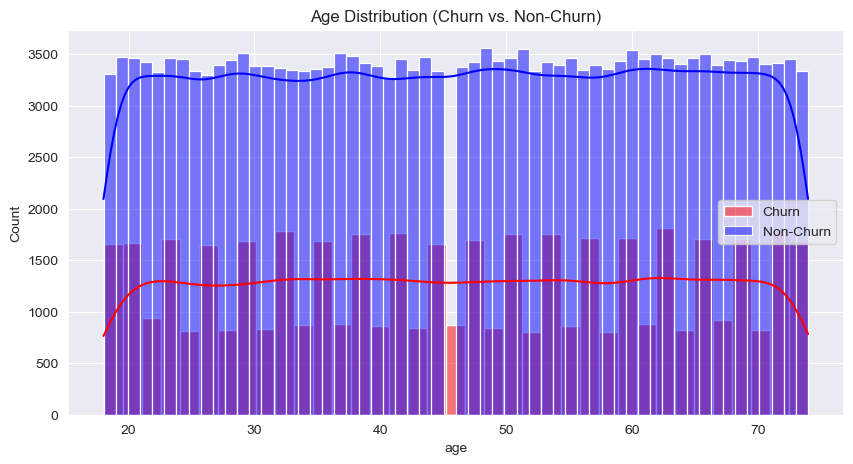

In [14]:
# Distribution of Age by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data[data['churn'] == 1]['age'], kde=True, label='Churn', color='red')
sns.histplot(data[data['churn'] == 0]['age'], kde=True, label='Non-Churn', color='blue')
plt.title("Age Distribution (Churn vs. Non-Churn)")
plt.legend()
plt.show()

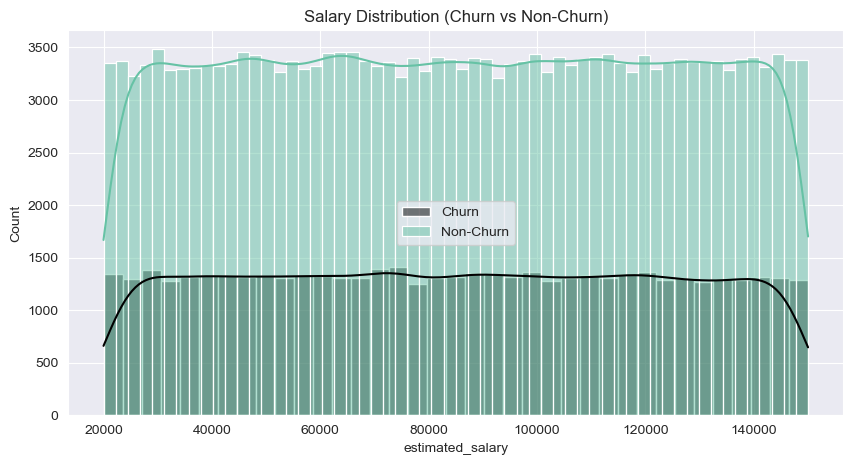

In [15]:
# Distribution of Estimated Salary by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data[data['churn'] == 1]['estimated_salary'], kde=True, color="black", label="Churn")
sns.histplot(data[data['churn'] == 0]['estimated_salary'], kde=True, label="Non-Churn")
plt.title("Salary Distribution (Churn vs Non-Churn)")
plt.legend()
plt.show()

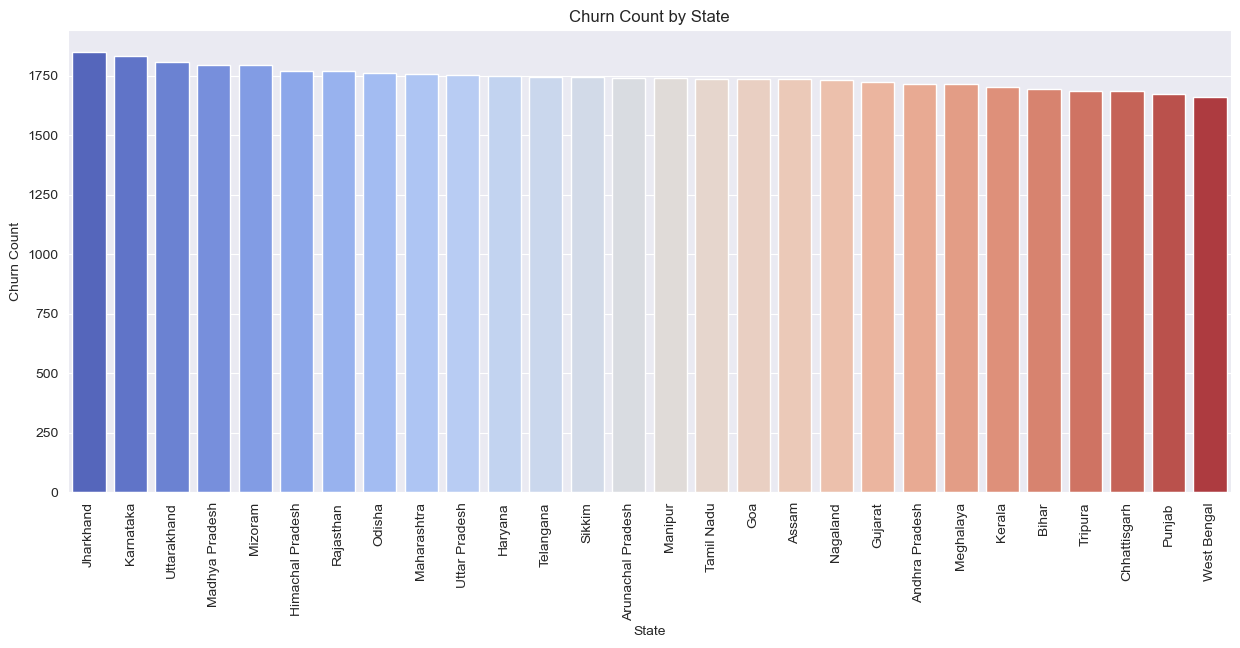

In [16]:
# Churn Distribution by State
plt.figure(figsize=(15, 6))
state_churn_counts = data[data['churn'] == 1]['state'].value_counts()
sns.barplot(x=state_churn_counts.index, y=state_churn_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Churn Count by State")
plt.xlabel("State")
plt.ylabel("Churn Count")
plt.show()

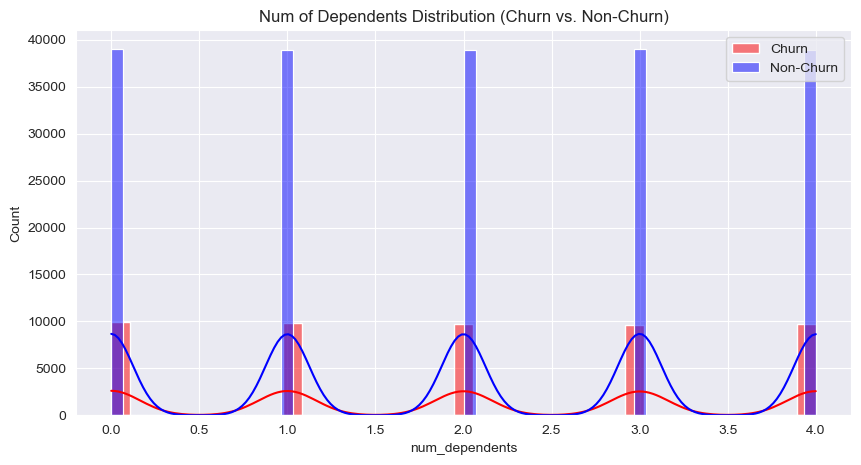

In [17]:
# Num of Dependents  by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data[data['churn'] == 1]['num_dependents'], kde=True, label='Churn', color='red')
sns.histplot(data[data['churn'] == 0]['num_dependents'], kde=True, label='Non-Churn', color='blue')
plt.title("Num of Dependents Distribution (Churn vs. Non-Churn)")
plt.legend()
plt.show()

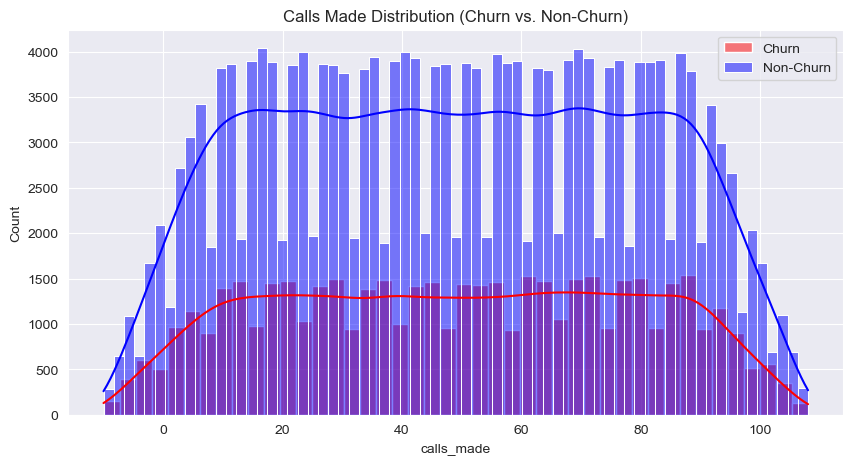

In [18]:
# Distribution of Calls Made by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data[data['churn'] == 1]['calls_made'], kde=True, label='Churn', color='red')
sns.histplot(data[data['churn'] == 0]['calls_made'], kde=True, label='Non-Churn', color='blue')
plt.title("Calls Made Distribution (Churn vs. Non-Churn)")
plt.legend()
plt.show()

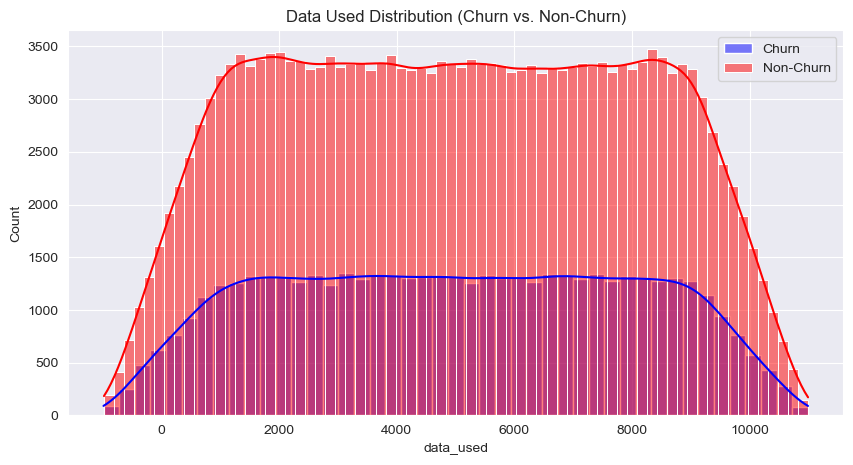

In [19]:
# Distribution of Data Used by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data[data['churn'] == 1]['data_used'], kde=True, label='Churn', color='blue')
sns.histplot(data[data['churn'] == 0]['data_used'], kde=True, label='Non-Churn', color='red')
plt.title("Data Used Distribution (Churn vs. Non-Churn)")
plt.legend()
plt.show()

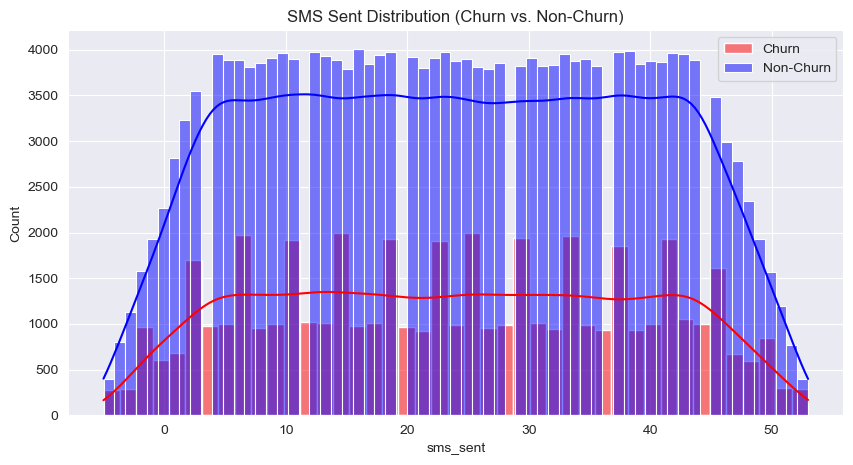

In [20]:
# Distribution SMS Sent Used by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data[data['churn'] == 1]['sms_sent'], kde=True, label='Churn', color='red')
sns.histplot(data[data['churn'] == 0]['sms_sent'], kde=True, label='Non-Churn', color='blue')
plt.title("SMS Sent Distribution (Churn vs. Non-Churn)")
plt.legend()
plt.show()

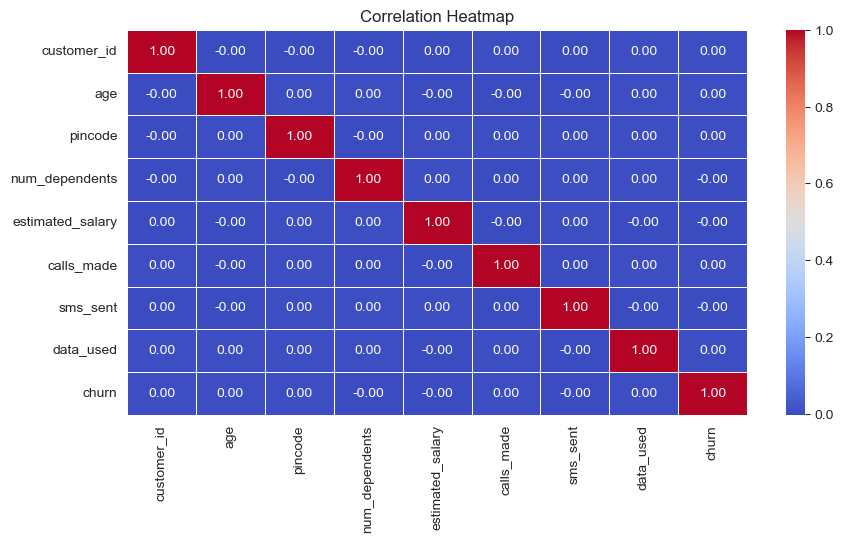

In [21]:
# Correlation matrix for numerical features
corr = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Class Imbalance Visualization

# Count of churned vs. non-churned customers
churn_counts = data['churn'].value_counts()
churn_labels = ['Non-Churn', 'Churn']
print(churn_counts)

0    194726
1     48827
Name: churn, dtype: int64


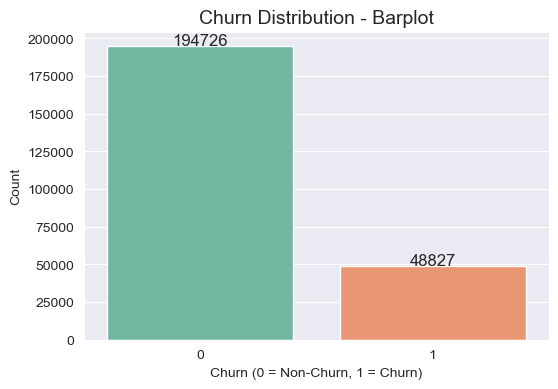

In [23]:
#Visualize the class distribution 
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='churn')
plt.title('Churn Distribution - Barplot', fontsize=14)
plt.xlabel('Churn (0 = Non-Churn, 1 = Churn)')
plt.ylabel('Count')
for index, value in enumerate(churn_counts):
    plt.text(index, value + 500, str(value), ha='center', fontsize=12)
plt.show()

# Data Preprocessing

In [24]:
#Drop customer_id 
data.drop(columns=['customer_id', 'pincode'], inplace=True)

In [25]:
data.head()

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,F,25,Karnataka,Kolkata,2020-01-01,4,124962,44,45,-361,0
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0


In [26]:
#Check for negative values in numeric columns
print("Negative values in columns:")
print((data[['calls_made', 'sms_sent', 'data_used']] < 0).sum())

Negative values in columns:
calls_made    6713
sms_sent      7375
data_used     6050
dtype: int64


In [27]:
# Replace negative values with column median
data['calls_made'] = data['calls_made'].apply(lambda x: data['calls_made'].median() if x < 0 else x)
data['sms_sent'] = data['sms_sent'].apply(lambda x: data['sms_sent'].median() if x < 0 else x)
data['data_used'] = data['data_used'].apply(lambda x: data['data_used'].median() if x < 0 else x)

In [28]:
# Check if there are any negative values left
print((data[['calls_made', 'sms_sent', 'data_used']] < 0).sum())

calls_made    0
sms_sent      0
data_used     0
dtype: int64


In [29]:
# Convert date_of_registration to datetime format
data['date_of_registration'] = pd.to_datetime(data['date_of_registration'])

In [30]:
# Calculate customer lifrtime 
data['tenure_days'] = (pd.to_datetime("2025-02-22") - data['date_of_registration']).dt.days

data = data.drop('date_of_registration', axis=1)

data['tenure_days'].head()

0    1879
1    1879
2    1879
3    1879
4    1879
Name: tenure_days, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

# Label Encode Binary Categorical Features
le = LabelEncoder()
data["telecom_partner"] = le.fit_transform(data["telecom_partner"])
data["gender"] = le.fit_transform(data["gender"])
data["state"] = le.fit_transform(data["state"])
data["city"] = le.fit_transform(data["city"])

data[['telecom_partner', 'gender', 'state', 'city']].head()

,telecom_partner,gender,state,city
0,2,0,10,4
1,2,0,16,5
2,3,0,1,2
3,1,1,22,4
4,1,0,24,2


In [32]:
data.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_days
0,2,0,25,10,4,4,124962,44.0,45.0,4987.0,0,1879
1,2,0,55,16,5,2,130556,62.0,39.0,5973.0,0,1879
2,3,0,57,1,2,0,148828,49.0,24.0,193.0,1,1879
3,1,1,46,22,4,1,38722,80.0,25.0,9377.0,1,1879
4,1,0,26,24,2,2,55098,78.0,15.0,1393.0,0,1879


In [33]:
# Save the processed data for further use or export
data.to_csv('Processed_Telecom_Churn.csv', index=False)